## Description of the final model

The final model chosen for the regression problem uses Random forest regression. This model was chosen as it had the lowest RMSE to start with. It could be concluded that this model overfitted the data resulting in a low RMSE. This was rectified by fine tuning the model through the use of Grid search. The max_feature hyperparameter obtained is 2 and n_estimators of 40. This allowed the RMSE to increase thus allowing us to conclude the data wan't overfitting.

### Importing packages and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Test = pd.read_csv('CS98XRegressionTest.csv')
Train = pd.read_csv('CS98XRegressionTrain.csv')

### Viewing data

In [3]:
Train.head(2)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37


In [4]:
Test.head(2)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3


In [5]:
Train.shape

(453, 15)

In [6]:
Test.shape

(114, 14)

In [79]:
Train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [ ]:
Train.dtypes

In [ ]:
Train.isnull().sum()

Only top genre is null with 15 missing values. This will not impact the regression analysis as the top genre column will not be included in the models as this doesn't influence a songs popularity.

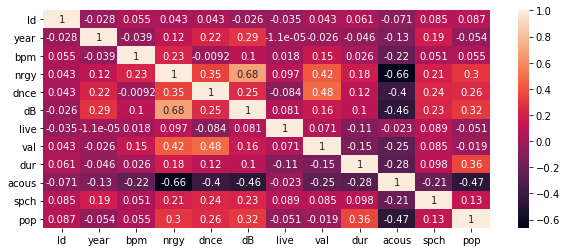

In [10]:
plt.figure(figsize =(10,4))
correlation = Train.corr()
sns.heatmap(correlation, annot=True)

Since pop is the dependent variable, we can use a correlation plot to determine any highly correlated variables. Having a high correlation coefficient with the dependent variable may lead to multicollinearity. There are no concerns for multicollinearity in this instance so all the independent variables will be used in the models. 'acous' has the highest correlation at -0.47 so could potentially be removed.

# Preparing the data

To get the data tables ready for the analysis, there are some columns that will not work with the methods as they prefer integers. The Id, title, artist, year, and top genre are not variables that would add to the regression analysis.

In [11]:
new_train = Train.drop(['pop', 'title', 'artist', 'top genre', 'year', 'Id'], axis=1)

In [12]:
new_train.head(2)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,107,31,45,-8,13,28,150,75,3
1,114,44,53,-8,13,47,139,49,3


In [13]:
y = Train['pop']

In [14]:
y.head(5)

0    44
1    37
2    77
3    67
4    63
Name: pop, dtype: int64

There are some unecessary columns in the training set that will be of no use in the regression analysis so are dropped from the table. We may also do the same for the testing data.

In [15]:
new_test = Test.drop(['title', 'artist', 'top genre', 'year', 'Id'], axis=1)

In [16]:
new_test.head(2)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,154,93,65,-3,75,74,213,1,18
1,161,39,30,-15,11,14,292,26,3


## Pipeline scaling

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ])

spotify_nums = num_pipeline.fit_transform(new_train)
spotify_nums

# Select and training models

In this section, we will use 4 different methods to carry out regression tasks. The method that will be used are: Linear regression, Support vector machines, Decision tree regressor, and Random forest regressor.

## Linear regression

To begin with, inear regression will be used as a baseline especially when there are more complex method used. This will be a multiple regression analysis since there is more than one independent variable.

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [20]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [21]:
model.fit(new_train,y)

LinearRegression()

In [22]:
y_pred = model.predict(new_train)

### Evaluation of linear regression

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 8.958056901442902
Mean Squared Error: 123.70955142545762
Root Mean Squared Error: 11.1224795538341


The model using linear regression method gives us a rough idea on model performance and will be used to compare more complex methods. The RMSE value on the training set is 11.12 is good and can be said it fits the training data quite well.
Later in the analysis, cross validation will be used to verify the models scores.

## Support vector machine regression

In this section, support vector machine (svm) regression will be used. This is a powerful method used in Machine learning that is able to perform linear and nonlinear regression.
SVM works well with large dataset as well.

### Linear SVM

In [24]:
from sklearn.svm import LinearSVR

In [ ]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(new_train,y)

In [26]:
svr_pred= svm_reg.predict(new_train)

### Evaluation of linear SVM

In [27]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, svr_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, svr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, svr_pred))

Root Mean Squared Error: 13.541752709690515
Mean Absolute Error: 10.098218460350276
Mean Squared Error: 183.3790664504104


Using linear SVM, the RMSE is 13.54 which when compared with just linear regression is a higher RMSE but most likely fits to the data better.

### Using polynomial kernel

In [28]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(new_train, y)

SVR(C=100, degree=2, kernel='poly')

In [29]:
poly_pred = svm_poly_reg.predict(new_train)

### Evaluation of polynomial kernel

In [30]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, poly_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, poly_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, poly_pred))

Root Mean Squared Error: 11.136039225149775
Mean Absolute Error: 8.570564527599101
Mean Squared Error: 124.0113696240744


Using polynomial kernel, the RMSE is 11.14 which when compared with just linear regression is a higher RMSE but most likely fits to the data better.

### Using RBF kernel

In [31]:
from sklearn.svm import SVC

In [32]:
from sklearn.svm import SVR
svm_rbf_reg = SVR(kernel="rbf", degree=2, C=0.001, epsilon=0.1)

In [33]:
svm_rbf_reg.fit(new_train,y)

SVR(C=0.001, degree=2)

In [34]:
rbf_pred = svm_rbf_reg.predict(new_train)

### Evaluation of rbf kernel

In [35]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, rbf_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, rbf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, rbf_pred))

Root Mean Squared Error: 13.647308653060783
Mean Absolute Error: 10.790301959981399
Mean Squared Error: 186.24903347190772


Using rbf kernel, the RMSE is 13.65 which when compared with just linear regression is a higher RMSE but most likely fits to the data better.

## Decision tree regressor

Decision tree trees are also very multifaceted ML algorithms that can carry out supervised learning. This is a good method as it considers different outcomes.

In [36]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(new_train, y)

DecisionTreeRegressor(max_depth=5)

In [37]:
dectree_pred = tree_reg.predict(new_train)

### Evaluation of decision tree

In [38]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, dectree_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, dectree_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, dectree_pred))

Root Mean Squared Error: 8.836081257004988
Mean Absolute Error: 6.89666797694724
Mean Squared Error: 78.07633198039484


This model shows that it has an RMSE of 8.83. It is very likely that the model has overfit the data. This will be validated using cross validation

## Random forest regressor

Random forest is an ensemble of decision tree. A few good predictors have already been built but ensemble methods are used when wanting to combine them to a better predictor. This method applies different learning methods

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [40]:
forest_reg.fit(new_train, y)

RandomForestRegressor()

In [41]:
forest_pred = forest_reg.predict(new_train)

### Evaluation of random forest

In [42]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, forest_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, forest_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, forest_pred))

Root Mean Squared Error: 4.197538198940819
Mean Absolute Error: 3.260816777041943
Mean Squared Error: 17.619326931567333


Random forest achieves an RMSE of 4.20 which is better than the linear regression model. This model could also be overfitting the data resulting in a low RMSE. This will be validated using cross validation.

# Validation using cross validation

A good method of evaluating a models accuracy is through the use of cross-valiadtion. All four models will be evaluated in this section.

### Linear regression cross validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(regression, new_train, y,
scoring="neg_mean_squared_error", cv=10) 
scores_reg = np.sqrt(-scores)

In [45]:
def display_scores(scores):
    
    print("Scores:", scores)
    print("Scores:", scores.mean())
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [46]:
display_scores(scores_reg)

Scores: [12.48578692 11.74490218 10.670771    9.36956456 11.79318277 13.53120674
 11.62493623 10.61754635 12.40585563  9.04773815]
Scores: 11.329149054834453
Mean: 11.329149054834453
Standard Deviation: 1.3344092852895875


In the original linear model, the RMSE was 11.12. When cross validated, it is confirmed the model still performs well with a score of 11.33

### Linear SVM cross validation

In [ ]:
scores2 = cross_val_score(svm_reg, new_train, y,
scoring="neg_mean_squared_error", cv=10) 
scores_reg2 = np.sqrt(-scores)

In [48]:
def display_scores(scores2):
    
    print("Scores:", scores2)
    print("Mean Scores:", scores2.mean())
    print("Mean:", scores2.mean())
    print("Standard Deviation:", scores2.std())

In [49]:
display_scores(scores_reg2)

Scores: [12.48578692 11.74490218 10.670771    9.36956456 11.79318277 13.53120674
 11.62493623 10.61754635 12.40585563  9.04773815]
Mean Scores: 11.329149054834453
Mean: 11.329149054834453
Standard Deviation: 1.3344092852895875


The model still overall performs well with a score of 11.33.

### Polynomial SVM cross validation

In [50]:
scores3 = cross_val_score(svm_poly_reg, new_train, y,
scoring="neg_mean_squared_error", cv=10) 
scores_reg3 = np.sqrt(-scores)

In [51]:
def display_scores(scores3):
    
    print("Scores:", scores3)
    print("Mean Scores:", scores3.mean())
    print("Mean:", scores3.mean())
    print("Standard Deviation:", scores3.std())

In [52]:
display_scores(scores_reg3)

Scores: [12.48578692 11.74490218 10.670771    9.36956456 11.79318277 13.53120674
 11.62493623 10.61754635 12.40585563  9.04773815]
Mean Scores: 11.329149054834453
Mean: 11.329149054834453
Standard Deviation: 1.3344092852895875


The score with polynomial cross validation is 11.33.

### RBF SVM cross validation

In [53]:
scores4 = cross_val_score(svm_rbf_reg, new_train, y,
scoring="neg_mean_squared_error", cv=10) 
scores_reg4 = np.sqrt(-scores)

In [54]:
def display_scores(scores4):
    
    print("Scores:", scores4)
    print("Mean Scores:", scores4.mean())
    print("Mean:", scores4.mean())
    print("Standard Deviation:", scores4.std())

In [55]:
display_scores(scores_reg4)

Scores: [12.48578692 11.74490218 10.670771    9.36956456 11.79318277 13.53120674
 11.62493623 10.61754635 12.40585563  9.04773815]
Mean Scores: 11.329149054834453
Mean: 11.329149054834453
Standard Deviation: 1.3344092852895875


Cross validation show the model still fits to the data well

### Cross validation with random forest

In [56]:
forest_score = cross_val_score(forest_reg, new_train, y,
scoring="neg_mean_squared_error", cv=10) 
scores_forest = np.sqrt(-scores)

In [57]:
def display_scores(forest_score):
    
    print("Scores:", forest_score)
    print("Mean Scores:", forest_score.mean())
    print("Mean:", forest_score.mean())
    print("Standard Deviation:", forest_score.std())

In [58]:
display_scores(scores_forest)

Scores: [12.48578692 11.74490218 10.670771    9.36956456 11.79318277 13.53120674
 11.62493623 10.61754635 12.40585563  9.04773815]
Mean Scores: 11.329149054834453
Mean: 11.329149054834453
Standard Deviation: 1.3344092852895875


When using cross validation, the RMSE has increased and the data was overfitting previously. 

# Fine tuning the model

We have successfully built a few candidate models that may be used to predict the popularity of Spotify songs. For our models, we will use grid search which allows for hyperparameters to be changed manually.

### SVM grid search

For grid search with SVM we will use the model using RBF kernel as it achieved the lowest score originally and when cross validated, the score had improved.

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001,0.2,0.3,0.4,0.5,0.6,0.7],'kernel': ['rbf']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(new_train,y)

In [61]:
print(grid.best_estimator_)

SVC(C=1, gamma=1)


In [62]:
print(grid.best_estimator_)

SVC(C=1, gamma=1)


### Random forest grid search

In [63]:
param_grid = [
{'n_estimators': [1, 5, 10, 20, 30, 40], 'max_features': [2, 4, 6, 8, 10]},
{'bootstrap': [False], 'n_estimators': [ 1, 5, 10, 20, 30, 40, 50], 'max_features': [2, 4, 6, 8, 10, 12]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
return_train_score=True) 

In [ ]:
grid_search.fit(new_train, y)

In [65]:
print(grid_search.best_params_)

{'max_features': 2, 'n_estimators': 40}


In [66]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=40)

From the grid search, the hyperparameters of SVM rbf kernel will be changed. The model has been successfully fine tuned and will be used on the test set.

# Changing the model after grid search

In [67]:
from sklearn.ensemble import RandomForestRegressor

grid_forest = RandomForestRegressor(n_estimators = 40, min_samples_split = 2, min_samples_leaf = 1, max_features = 2,
                                   max_depth = 100, bootstrap = True)
grid_forest.fit(new_train, y)

RandomForestRegressor(max_depth=100, max_features=2, n_estimators=40)

In [68]:
grid_pred = grid_forest.predict(new_train)

In [69]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, grid_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, grid_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, grid_pred))

Root Mean Squared Error: 4.246111225679192
Mean Absolute Error: 3.3380242825607063
Mean Squared Error: 18.02946054083885


The RMSE has decreased down to around 4 after fine tuning the model which may aid in the conclusion that the model fits the data well.

# Evaluation on test set

In [70]:
final_model = grid_search.best_estimator_

In [71]:
X = num_pipeline.transform(spotify_nums)
final_predictions = final_model.predict(spotify_nums)
final_mse = mean_squared_error(y, final_predictions) 
final_rmse = np.sqrt(final_mse)

In [ ]:
final_predictions

In [73]:
last_test = final_model.predict(new_test)

In [74]:
final_rmse

14.332348713550028

In [75]:
last_test = final_model.predict(new_test)

# Converting data to CSV

In [76]:
submission = pd.DataFrame({"Id":Test["Id"], "pop": last_test})
submission.head(2)

,Id,pop
0,454,68.675
1,455,63.525


In [77]:
file = "RegressionPredictions.csv"

submission.to_csv(file, index = False, header = 1)

# Conclusion

The following model that has been chosen for the regression problem was the best out of all of the tested models/methods. To start with, at the beginning of this report, data cleaning was vital to the successful analysis. Certain columns were removed from the training dataset as they would not be of any use as these factors in hindsight do not contribute to how popular a song will be.
The four different methods used in this report have all been able to build a successful ML algorithm. 

The final model chosen used random forest regression. This is because it gives a higher accuracy with cross validation when compared to other algorithms. When the final RMSE is checked after evaluation on the test data, it scores 14.29 which is actually an indication that it fits the data quite well.

From the Kaggle InClass competition, the model achieves a score of 8.30269 thus concluding the model built has been successful in predicting the popularity of a song.
To improve on the model, other variables such as artist could be included as this may disctate popularity